# **TASK - Next Word Prediction**

Using Tensorflow and Keras library train a RNN , to predict the next word.

For problem statement and guidance : https://thecleverprogrammer.com/2020/07/20/next-word-prediction-model/

In [1]:
import tensorflow as tf
import numpy as np
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import heapq

from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

### **Loading Data**
Now let’s load the data and have a quick look at what we are going to work with:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NWP-DATA.txt to NWP-DATA.txt


### **Cleaning the data:**

In [3]:
file = open("NWP-DATA.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Sherlock Holmes Author: Arthur Conan Doyle Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set en"

In [4]:
len(data)

573660

In [5]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

" Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net   Title: The Adventures of Sherl"

In [6]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

' Project Gutenberg s The Adventures of Sherlock Holmes  by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever   You may copy it  give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www gutenberg net   Title  The Adventures of Sherlock Holmes  Author  Arthur Conan Doyle  Release Date  November 29  2002  EBook  1661  Last Updated  May 20  2019  Language  English  Charact'

In [7]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use anyone anywhere at no cost and with almost restrictions whatsoever. You may copy it, give it away or re-use under terms Gutenberg License included this online www.gutenberg.net Title: Holmes Author: Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set encoding: UTF-8 *** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES SHERLOCK HOLMES Prod"

### **Tokenization:**

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[838, 3083, 56, 322, 57, 1523, 15, 95, 839, 3084]

In [9]:
len(sequence_data)

17679

In [10]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8931


In [11]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  17678


array([[ 838, 3083],
       [3083,   56],
       [  56,  322],
       [ 322,   57],
       [  57, 1523],
       [1523,   15],
       [  15,   95],
       [  95,  839],
       [ 839, 3084],
       [3084, 3085]])

In [12]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [13]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 838 3083   56  322   57]
The responses are:  [3083   56  322   57 1523]


In [14]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### **Creating the Model:**

In [15]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             89310     
                                                                 
 lstm (LSTM)                 (None, 1, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8931)              8939931   
                                                                 
Total params: 22,078,241
Trainable params: 22,078,241
Non-trainable params: 0
_________________________________________________________________


### **Plot The Model**

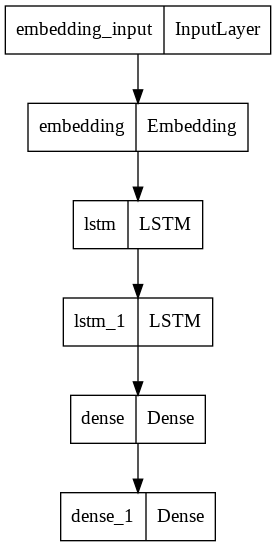

In [17]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

### **Callbacks:**

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

### **Compile The Model:**

In [19]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))

### **Fit The Model:**

In [20]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
277/277 [==============================] - ETA: 0s - loss: 8.8538
Epoch 00001: loss improved from inf to 8.85384, saving model to nextword1.h5
277/277 [==============================] - 79s 273ms/step - loss: 8.8538 - lr: 0.0010
Epoch 2/150
277/277 [==============================] - ETA: 0s - loss: 8.3636
Epoch 00002: loss improved from 8.85384 to 8.36355, saving model to nextword1.h5
277/277 [==============================] - 76s 273ms/step - loss: 8.3636 - lr: 0.0010
Epoch 3/150
277/277 [==============================] - ETA: 0s - loss: 8.0853
Epoch 00003: loss improved from 8.36355 to 8.08525, saving model to nextword1.h5
277/277 [==============================] - 76s 273ms/step - loss: 8.0853 - lr: 0.0010
Epoch 4/150
277/277 [==============================] - ETA: 0s - loss: 7.8398
Epoch 00004: loss improved from 8.08525 to 7.83984, saving model to nextword1.h5
277/277 [==============================] - 75s 272ms/step - loss: 7.8398 - lr: 0.0010
Epoch 5/150
277/277 [===

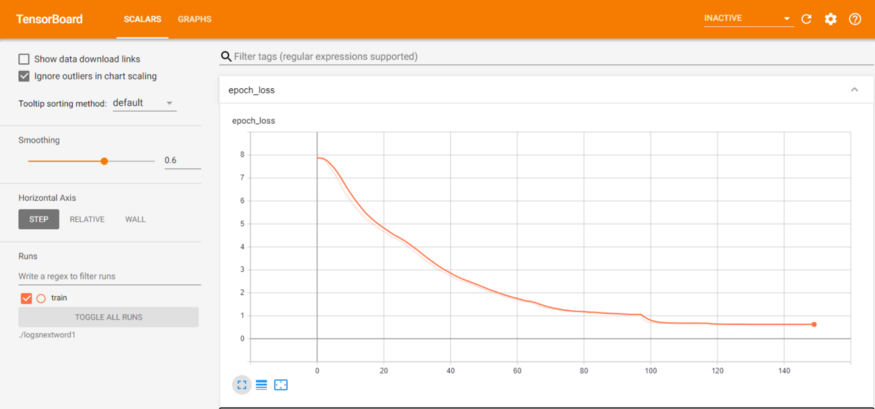

In [25]:
from IPython.display import Image 
pil_img = Image(filename='graph.png')
display(pil_img)

# **Prediction**
For the prediction notebook, we will load the tokenizer file which we have stored in the pickle format. We will then load our next word model which we have saved in our directory. We will use this same tokenizer to perform tokenization on each of the input sentences for which we should make the predictions on. After this step, we can proceed to make predictions on the input sentence by using the saved model.

# **Observation**
We are able to develop a high-quality next word prediction for the metamorphosis dataset. We are able to reduce the loss significantly in about 150 epochs. The next word prediction model which we have developed is fairly accurate on the provided dataset. The overall quality of the prediction is good. However, certain pre-processing steps and certain changes in the model can be made to improve the prediction of the model.